# Process
In this notebook, we will analyse the effect of the recommendation process on the country distribution. Code segments taken from <a href = "https://github.com/rahmanidashti/FairBook"> Fairbook </a>.

## A. Import Libraries

In [16]:
import warnings
import pickle as pkl
warnings.simplefilter(action='ignore', category=FutureWarning)
import matplotlib.pyplot as plt
import random as rd
import pandas as pd
import numpy as np
pd.set_option("display.precision", 6)
from cornac.metrics import MAE, MSE, RMSE, Precision, Recall, NDCG, AUC, MAP, FMeasure, MRR
from collections import defaultdict
from scipy import stats
from collections import Counter
import matplotlib as mpl
import seaborn as sns
# set plot style: grey grid in the background:
sns.set(style="darkgrid")

## B. Set Hyperparameters

In [2]:
item_col = "ISBN" # the item column
my_seed = 0 # random_seed
rd.seed(my_seed)
np.random.seed(my_seed)

## C. Read Files
Files to read:
1. exp_results & exp_metrics: the Cornac results & metrics
2. training_ids: the user training ids
3. low, mid and high USA oriented users

In [3]:
raw_file_location = "data/raw/" # here are stored the raw data files
processed_file_location = "data/processed/" # here we store the processed data files
results_file_location = "data/results/" # here we store the results of the recommendation process

### C1. General results

In [4]:
# results
with open(results_file_location+"experiment_results_cornac.pkl", "rb") as f:
    exp_results = pkl.load(f)
with open(results_file_location+"experiment_metrics_cornac.pkl", "rb") as f:
    exp_metrics = pkl.load(f)

In [5]:
# The ids of users in the training data
with open(results_file_location+"/training_user_ids.pkl", "rb") as f:
    training_ids = pkl.load(f)

### C2. Country analysis results

In [6]:
with open(results_file_location+"/high_users_USA_results.csv", "rb") as f:
    USA_oriented_users = pd.read_csv(f, index_col=0)
with open(results_file_location+"/med_users_USA_results.csv", "rb") as f:
    midUSA_oriented_users =  pd.read_csv(f, index_col=0)
with open(results_file_location+"/low_users_USA_results.csv", "rb") as f:
    lowUSA_oriented_users =  pd.read_csv(f,  index_col=0)

## D. Analyze Results

In [7]:
algo_names = ['Random', 'MostPop', 'UserKNN', 'MF', 'PMF', 'BPR', 'NMF', 'WMF', 'PF', 'NeuMF', 'VAECF']

### Country

#### Total results

In [8]:
full_dataset_country = pd.concat([USA_oriented_users, lowUSA_oriented_users, midUSA_oriented_users])

In [9]:
old_avg_country = full_dataset_country.ratio_USA.mean()
new_avg_country = []

for alg in algo_names:
    new_avg_country.append(full_dataset_country["new_ratio_USA_"+alg].mean())

In [10]:
dict_avg = {}
for i in range(len(algo_names)):
    dict_avg[algo_names[i]] = new_avg_country[i]

In [11]:
dict_avg = sorted(dict_avg.items(), key=lambda x: x[1], reverse=True)

In [12]:
def swapPositions(list, pos1, pos2):
     
    list[pos1], list[pos2] = list[pos2], list[pos1]
    return list

In [13]:
new_l = dict_avg.copy()
for i in range(2,10,1):
    new_l = swapPositions(new_l, i, i+1)
    
for i in range(6,10,1):
    new_l = swapPositions(new_l, i, i+1)

In [14]:
dict_avg = new_l

In [22]:
colors = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6','#6a3d9a','#ffff99']

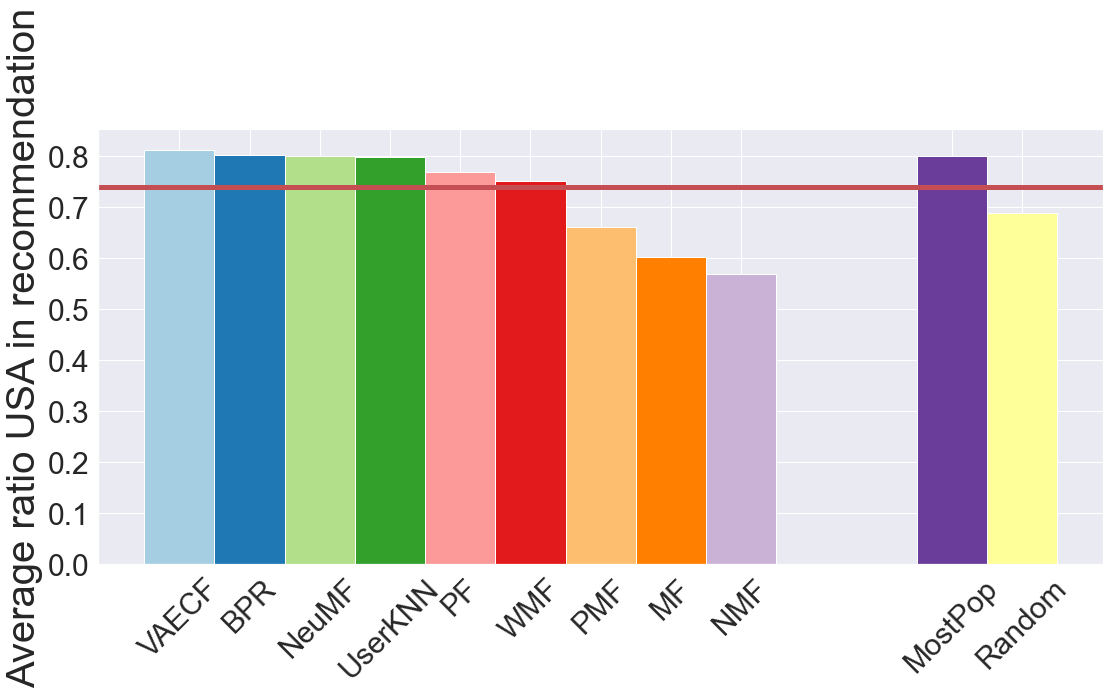

In [26]:
sns.set(rc = {'figure.figsize':(18,8)})

# set width of bar
barWidth = 0.07

# set height of bar
barsx = old_avg_country # not included in this version

bars1 = [dict_avg[0][1]]
bars2 = [dict_avg[1][1]]
bars3 = [dict_avg[2][1]]
bars4 = [dict_avg[3][1]]
bars5 = [dict_avg[4][1]]
bars6 = [dict_avg[5][1]]
bars7 = [dict_avg[6][1]]
bars8 = [dict_avg[7][1]]
bars9 = [dict_avg[8][1]]
bars10 = [dict_avg[9][1]]
bars11 = [dict_avg[10][1]]


# Set position of bar on X axis
r1 = len(bars1)
r2 = r1 + barWidth
r3 = r2 + barWidth
r4 = r3 + barWidth
r5 = r4 + barWidth
r6 = r5 + barWidth
r7 = r6 + barWidth
r8 = r7 + barWidth
r9 = r8 + barWidth
r10 = r9 + 3*barWidth
r11 = r10 + barWidth

# ['Random', 'MostPop', 'UserKNN', 'MF', 'PMF', 'BPR', 'NMF', 'WMF', 'PF', 'NeuMF', 'VAECF']
patterns = [ "/" , "\\" , "|" , "-" , "+" , "x", "o", "O", ".", "*", "--", "\/"]

# Make the plot
#plt.bar(r12, bars12, width=barWidth, label='Profile', hatch=patterns[11])
plt.bar(r1, bars1, width=barWidth, tick_label=dict_avg[0][0], color = colors[0])
plt.bar(r2, bars2, width=barWidth, tick_label=dict_avg[1][0], color = colors[1])
plt.bar(r3, bars3, width=barWidth, tick_label=dict_avg[2][0], color = colors[2])
plt.bar(r4, bars4, width=barWidth, tick_label=dict_avg[3][0], color = colors[3])
plt.bar(r5, bars5, width=barWidth, tick_label=dict_avg[4][0], color = colors[4])
plt.bar(r6, bars6, width=barWidth, tick_label=dict_avg[5][0], color = colors[5])
plt.bar(r7, bars7, width=barWidth, tick_label=dict_avg[6][0], color = colors[6])
plt.bar(r8, bars8, width=barWidth, tick_label=dict_avg[7][0], color = colors[7])
plt.bar(r9, bars9, width=barWidth, tick_label=dict_avg[8][0], color = colors[8])
plt.bar(r10, bars10, width=barWidth, tick_label=dict_avg[9][0], color = colors[9])
plt.bar(r11, bars11, width=barWidth, tick_label=dict_avg[10][0], color = colors[10])


# Add xticks on the middle of the group bars + show legend
plt.ylabel('Average ratio USA in recommendation', fontsize='40')

plt.axhline(y = barsx, color = 'r', linestyle = '-', linewidth=5)
plt.xticks([r1,r2,r3,r4,r5,r6,r7,r8,r9,r10,r11], [x[0] for x in dict_avg], fontsize='30', rotation=45)
plt.yticks(fontsize='30')
#plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0., framealpha=1, fontsize='30')
plt.show()

#### Results per user

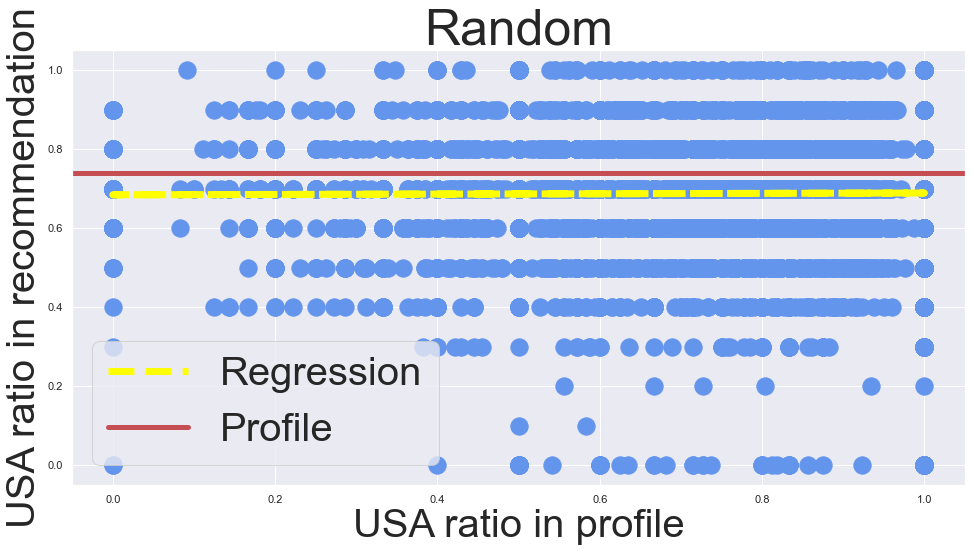

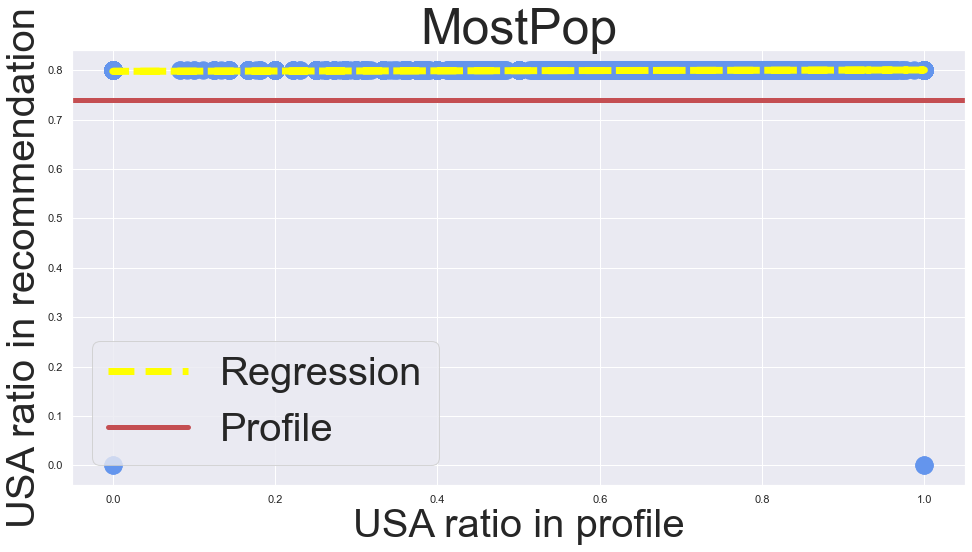

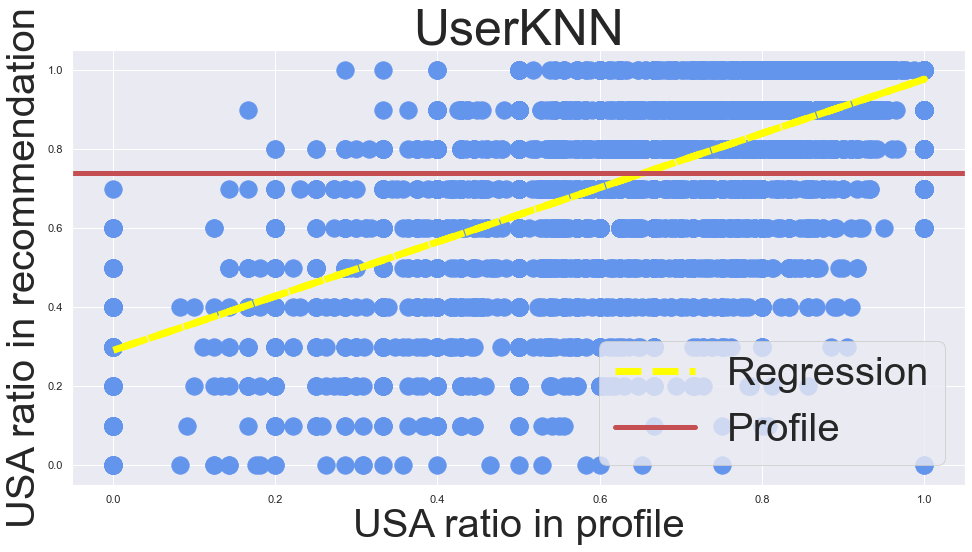

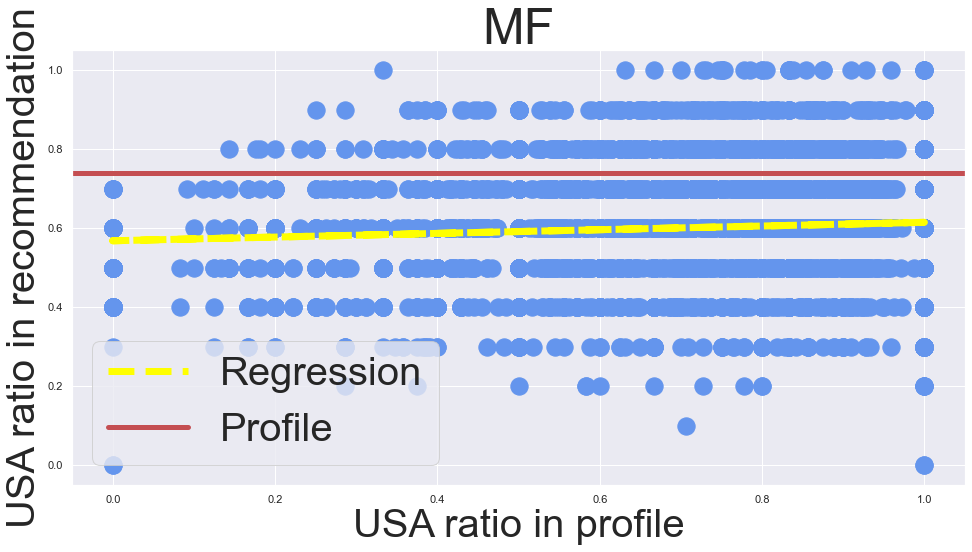

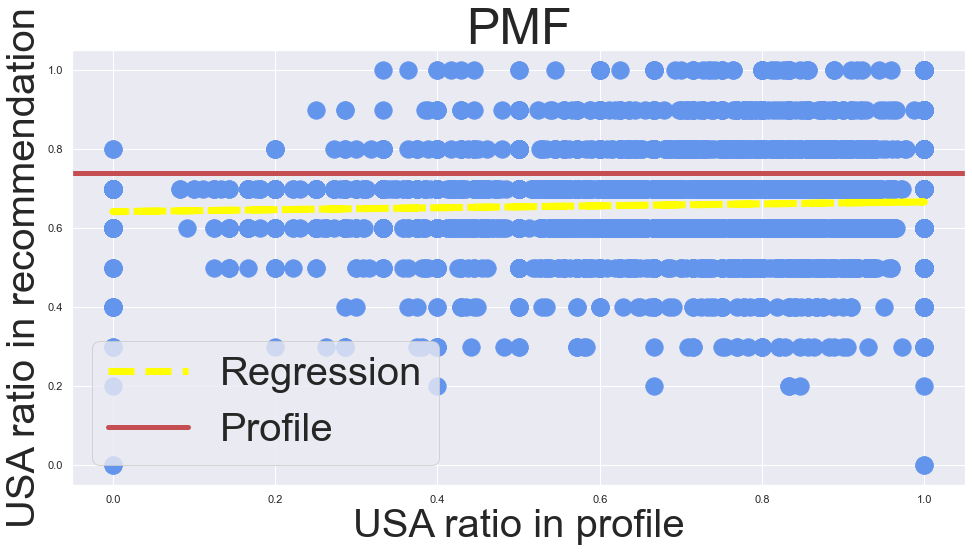

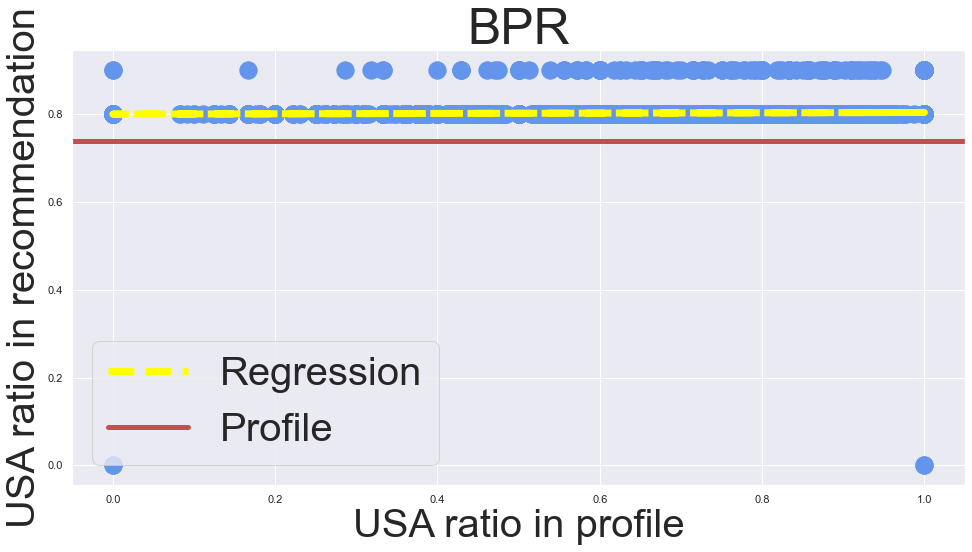

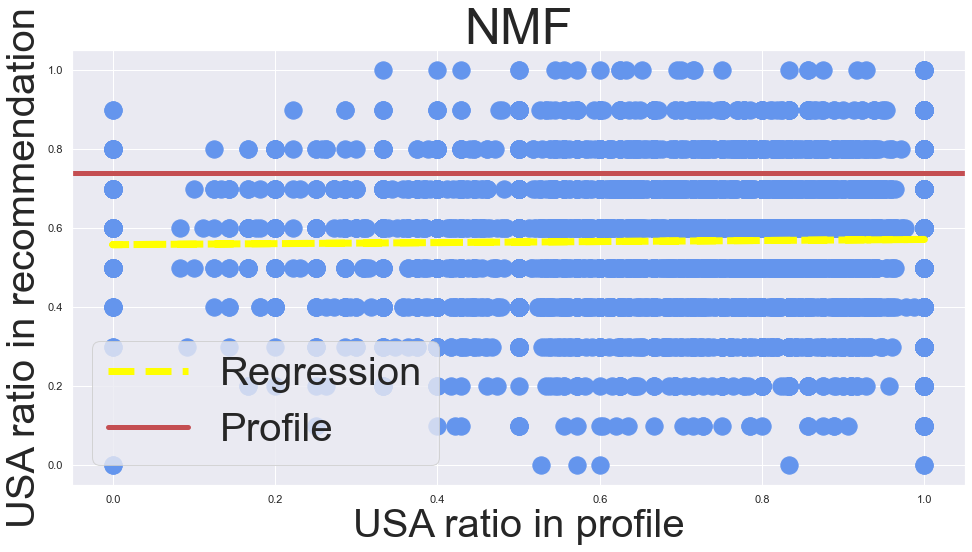

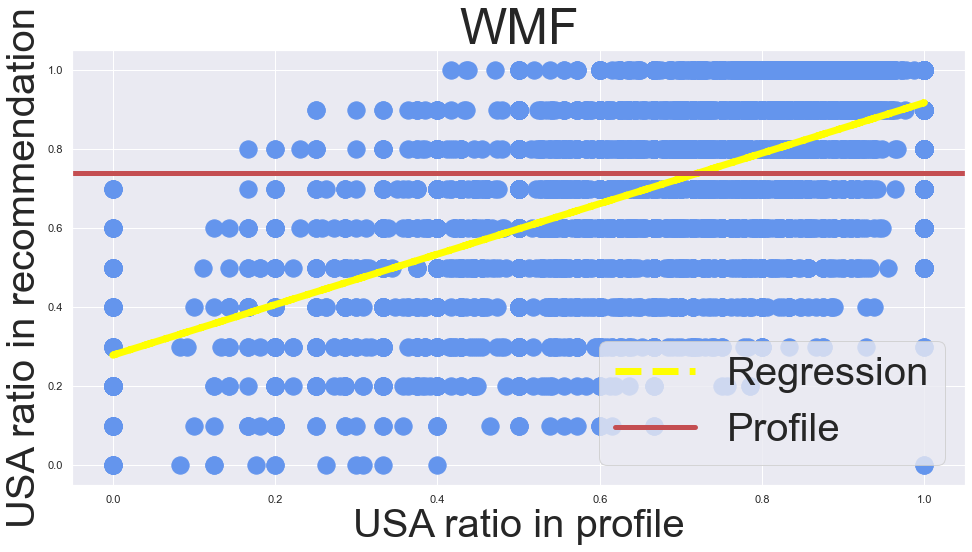

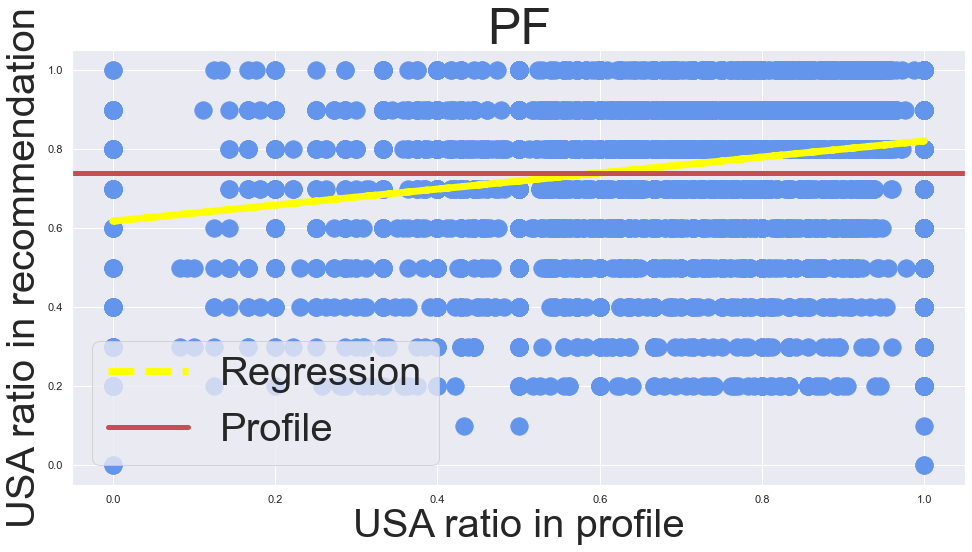

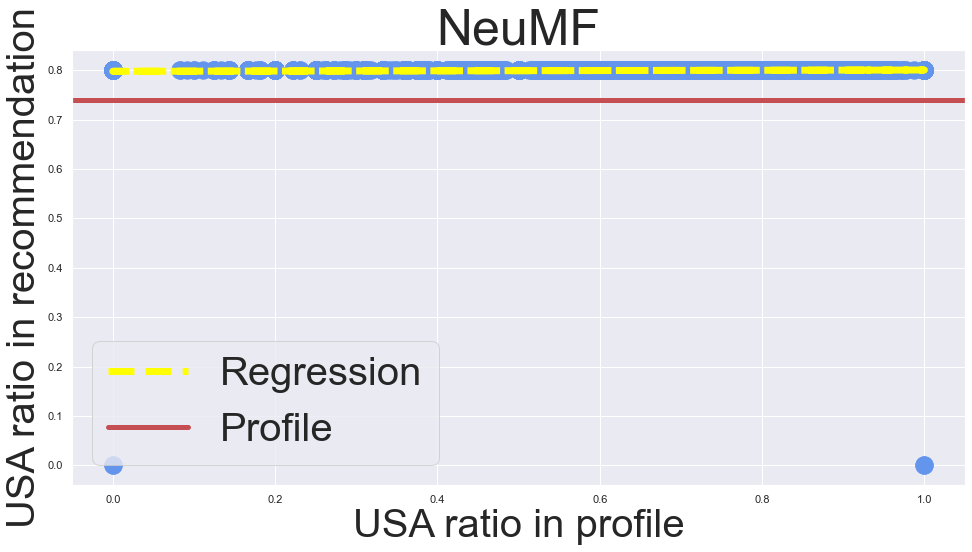

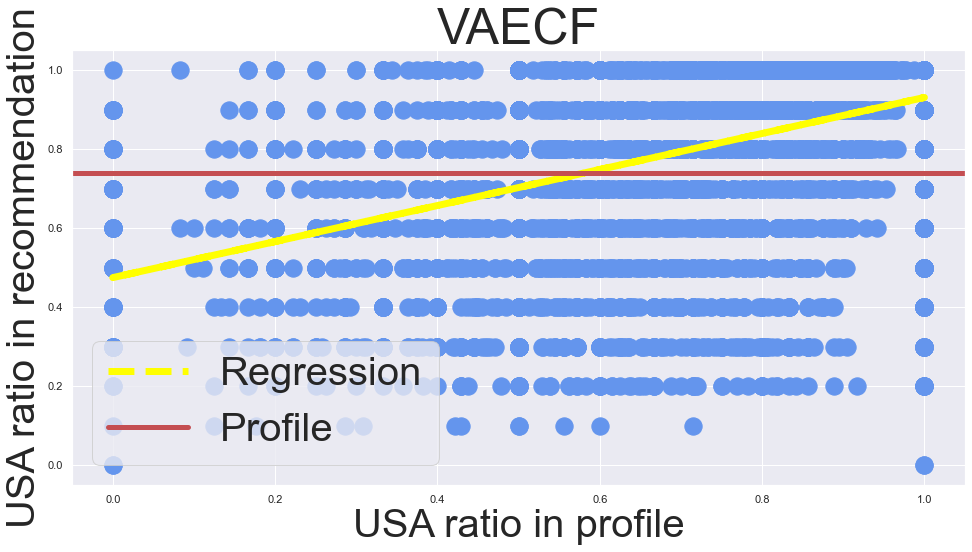

In [22]:
sns.set(rc = {'figure.figsize':(16,8)})
values_before = full_dataset_country.ratio_USA.values
for alg in algo_names:
    values_after = full_dataset_country["new_ratio_USA_"+alg].values
    
    
    slope, intercept, r_value, p_value, std_err = stats.linregress(values_before, values_after)
    line = slope * np.array(values_before) + intercept
    
    #plt.plot(values_before, values_after, 'o', values_before, line, linewidth = 3)
    plt.scatter(values_before, values_after, s=300, color = "cornflowerblue")
    font = {'size': 40}
    plt.title(alg, fontdict={'size' :50})
    #plt.plot(line)
    plt.plot(values_before, line, label = "Regression", linestyle = '--', 
             color = 'yellow', linewidth=7)

    plt.axhline(y = bars12, color = 'r', linestyle = '-', label = "Profile", linewidth=5)
    plt.xlabel("USA ratio in profile", fontdict=font)
    plt.ylabel("USA ratio in recommendation", fontdict=font)
    plt.legend(prop={ 'size':40})
    plt.show()